In [3]:
# Import standard libraries
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy.stats as ss
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
from tqdm import tqdm
# Import custom libraries
import process_hic_contacts_inter as phc

In [4]:
# Reload modules in case of modifications
reload(phc)

<module 'process_hic_contacts_inter' from '/home/louiscam/projects/gpcr/code/IMR90_hic_preprocessing/process_hic_contacts_inter.py'>

In [103]:
# Specify directories and relevant information
genome_dir = '/home/louiscam/projects/gpcr/data/genome_data/'
raw_hic_dir = '/home/louiscam/projects/gpcr/data/hic/'
saving_dir = '/home/louiscam/projects/gpcr/save/figures/'
cell_type = 'IMR90'
resol_str = '250kb'
resol = 250000
quality = 'MAPQGE30'
chr1 = 3
chr2 = 8

In [104]:
raw_hic_dir+cell_type+'_interchromosomal/'+resol_str+'_resolution_normvectors/'+'chr'+str(chr1)+'_'+resol_str+'_INTERKRnorm'

'/home/louiscam/projects/gpcr/data/hic/IMR90_interchromosomal/250kb_resolution_normvectors/chr3_250kb_INTERKRnorm'

### Load data

In [105]:
# Load raw HiC data
raw_hic_data = phc.get_raw_hic_sparse(raw_hic_dir, cell_type, resol_str, resol, quality, chr1, chr2)
raw_hic_data.head()

,locus_chr1,locus_chr2,value,norm_locus_chr1,norm_locus_chr2
0,0,0,1.0,0.697466,0.323424
1,2,0,1.0,0.632197,0.323424
2,4,0,1.0,0.621789,0.323424
3,5,0,1.0,0.640020,0.323424
4,8,0,1.0,0.648612,0.323424


In [106]:
# Normalize HiC data
normalized_hic_data = phc.normalize_raw_hic_sparse(raw_hic_data)
normalized_hic_data.head()

,locus_chr1,locus_chr2,value,norm_locus_chr1,norm_locus_chr2,norm_value
0,0,0,1.0,0.697466,0.323424,4.433075
1,2,0,1.0,0.632197,0.323424,4.890753
2,4,0,1.0,0.621789,0.323424,4.972613
3,5,0,1.0,0.640020,0.323424,4.830969
4,8,0,1.0,0.648612,0.323424,4.766973


In [107]:
# Get chromosome sizes
df_sizes = phc.get_chrom_sizes(genome_dir,resol)
chr1_size = int(df_sizes[df_sizes['chr']==str(chr1)]['size_loci'])
chr2_size = int(df_sizes[df_sizes['chr']==str(chr2)]['size_loci'])
df_sizes.head(11)

,chr,size,size_loci,size_roundup
0,1,249250621,998,249500000
1,2,243199373,973,243250000
2,3,198022430,793,198250000
3,4,191154276,765,191250000
4,5,180915260,724,181000000
5,6,171115067,685,171250000
6,7,159138663,637,159250000
7,X,155270560,622,155500000
8,8,146364022,586,146500000
9,9,141213431,565,141250000


In [108]:
# Get dense HiC dataframe
df = phc.get_dense_hic_dataframe(normalized_hic_data, chr1_size, chr2_size, resol)
df.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,144000000,144250000,144500000,144750000,145000000,145250000,145500000,145750000,146000000,146250000
0,4.433075,0.000000,6.488417,3.691065,4.405899,4.509418,5.546883,2.575942,7.340238,2.039878,...,3.180944,2.804275,0.000000,0.000000,0.000000,5.864906,1.081142,1.809536,3.885761,10.444873
250000,0.000000,2.230361,8.158865,3.978285,1.582914,4.860318,1.992838,1.850926,1.054856,1.465740,...,3.809410,2.014993,2.972640,0.000000,0.000000,0.000000,0.776847,1.950345,2.233670,10.006791
500000,4.890753,3.424466,7.158292,8.144274,7.291157,4.974978,0.000000,2.841887,3.239223,0.000000,...,4.679133,0.000000,2.282076,1.137382,2.499482,0.000000,0.000000,1.996355,4.286933,3.841073
750000,0.000000,0.000000,1.855749,2.111359,0.000000,2.579472,1.586461,0.000000,1.679502,2.333697,...,7.278240,1.069399,0.000000,0.000000,1.295954,0.000000,0.000000,2.070177,0.000000,3.983110
1000000,4.972613,0.000000,0.000000,2.070148,2.471065,0.000000,1.555495,0.000000,1.646720,0.000000,...,1.189363,0.000000,1.160136,0.000000,0.000000,6.578709,1.212725,0.000000,0.000000,7.810728


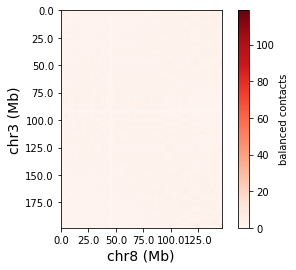

In [109]:
# Plot HiC dense dataframe
plotname = 'norm_hic_'+'chr'+str(chr1)+'_'+'chr'+str(chr2)+'.eps'
hic_plots_dir = '../../save/hic_plots_dir/'
phc.plot_dense_hic_dataframe(df, chr1, chr2, plotname, hic_plots_dir, show=True)

In [110]:
# All-0 rows and columns
print(f'All-0 rows = {df.index.to_series()[df.sum(axis=1)==0].index.values}')
print(f'All-0 columns = {df.columns.to_series()[df.sum(axis=0)==0].index.values}')

All-0 rows = [ 90500000  90750000  91000000  91250000  91500000  91750000  92000000
  92250000  92500000  92750000  93000000  93250000 198000000]
All-0 columns = [ 7250000  7500000  7750000 44000000 44250000 44500000 44750000 45000000
 45250000 45500000 45750000 46000000 46250000 46500000]


### Filter out centromeres

In [111]:
# Get centromere locations
df_centrom = phc.get_centromere_locations(genome_dir)
df_centrom.head()

,bin,chrom,chromStart,chromEnd,ix,n,size,type,bridge
0,23,chr1,121535434,124535434,1270,N,3000000,centromere,no
1,20,chr2,92326171,95326171,770,N,3000000,centromere,no
2,2,chr3,90504854,93504854,784,N,3000000,centromere,no
3,1,chr4,49660117,52660117,447,N,3000000,centromere,no
4,14,chr5,46405641,49405641,452,N,3000000,centromere,no


In [112]:
# Filter out centromeres
filter_size = 2000000
df = phc.filter_centromeres(df, chr1, 'row', df_centrom, filter_size, resol)
df = phc.filter_centromeres(df, chr2, 'col', df_centrom, filter_size, resol)

In [113]:
# Save dictionary of pericentromeric regions
pericentromeric_dict = {}
for chrom in tqdm(np.arange(1, 22+1)):
    perictm_start = (int(df_centrom[df_centrom['chrom']=='chr'+str(chrom)]['chromStart'])//resol)*resol-filter_size
    perictm_end = (int(df_centrom[df_centrom['chrom']=='chr'+str(chrom)]['chromEnd'])//resol)*resol+filter_size
    pericentromeric_dict[str(chrom)] = np.arange(perictm_start, perictm_end+resol, resol)
with open(saving_dir+'pericentromeric_dict.pkl', 'wb') as f:
    pickle.dump(pericentromeric_dict, f)

100%|██████████| 22/22 [00:00<00:00, 1051.05it/s]


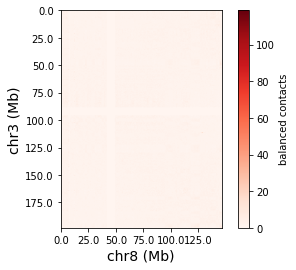

In [114]:
# Plot HiC data after filtering out centromeres
plotname = 'norm_filtcentromeres_hic_'+'chr'+str(chr1)+'_'+'chr'+str(chr2)+'.eps'
hic_plots_dir = '../../save/hic_plots_dir/'
phc.plot_dense_hic_dataframe(df, chr1, chr2, plotname, hic_plots_dir, show=True)

### Filter out repeats

In [115]:
dic_repeats_tofilter

{'1': array([ 20250000,  28500000,  28750000,  31500000,  32750000,  35500000,
         41500000,  45500000,  45750000,  46250000,  47250000,  48750000,
         49500000,  49750000,  50000000,  50250000,  51250000,  51500000,
         52500000,  53000000,  53250000,  55250000,  69000000,  69750000,
         71000000,  73500000,  75250000,  89500000,  89750000,  91500000,
         93750000, 102500000, 102750000, 105000000, 105750000, 106250000,
        108750000, 111250000, 111500000, 113250000, 119000000, 121250000,
        146750000, 155500000, 157250000, 159250000, 160750000, 164000000,
        171250000, 173250000, 173500000, 174000000, 176000000, 179250000,
        181750000, 191000000, 203750000, 211000000, 225000000, 225250000,
        244500000, 244750000, 248250000]),
 '2': array([ 22250000,  31750000,  35250000,  35750000,  47750000,  48250000,
         57250000,  61750000,  62000000,  63250000,  63500000,  73500000,
         73750000,  86750000,  88500000,  97000000,  985000

In [116]:
# Filter repeats for chr1 and chr2
df = phc.filter_repeats(df, chr1, dic_repeats_tofilter, 'row')
df = phc.filter_repeats(df, chr2, dic_repeats_tofilter, 'col')

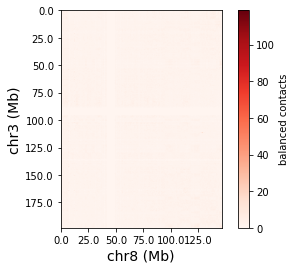

In [117]:
# Plot HiC data after filtering out centromeres
%matplotlib inline
plotname = 'norm_filtcentromeres_filtrepeats_hic_'+'chr'+str(chr1)+'_'+'chr'+str(chr2)+'.eps'
hic_plots_dir = '../../save/hic_plots_dir/'
phc.plot_dense_hic_dataframe(df, chr1, chr2, plotname, hic_plots_dir, show=True)

## Log-transform and filter out outliers

In [122]:
# Log-transform dataframe
df_transformed = phc.log_transform(df)

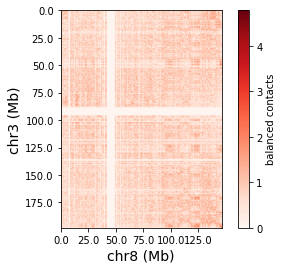

In [123]:
# Plot HiC data after filtering out centromeres
plotname = ''
hic_plots_dir = '../../save/hic_plots_dir/'
phc.plot_dense_hic_dataframe(df_transformed, chr1, chr2, plotname, hic_plots_dir, show=True)

In [120]:
# Filter out outliers
outliers_list = []
df_transformed, ind_row, ind_col = phc.filter_outliers(df_transformed)
outliers_list = outliers_list+[f'chr_{chr1}_loc_{i*resol}' for i in ind_row]
outliers_list = outliers_list+[f'chr_{chr2}_loc_{i*resol}' for i in ind_col]
print(ind_row)
print(ind_col)
print(outliers_list)

[223 445]
[]
['chr_3_loc_55750000', 'chr_3_loc_111250000']


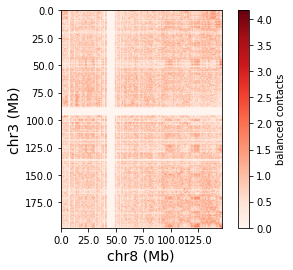

In [121]:
# Plot HiC data after filtering out centromeres, repeats and outliers
plotname = 'norm_filtcentromeres_filtrepeats_filtoutliers_hic_'+'chr'+str(chr1)+'_'+'chr'+str(chr2)+'.eps'
hic_plots_dir = '../../save/hic_plots_dir/'
phc.plot_dense_hic_dataframe(df_transformed, chr1, chr2, plotname, hic_plots_dir, show=True)

In [84]:
df_transformed.head()

,0,250000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,...,144000000,144250000,144500000,144750000,145000000,145250000,145500000,145750000,146000000,146250000
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.636368,4.566684,4.964251
250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
500000,0.00000,5.072670,3.530843,0.000000,0.000000,3.851891,4.054978,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.094245,3.184371,0.000000,3.139681,4.033802,2.826338,5.654702
750000,4.93157,4.309525,3.004702,2.683675,1.772245,1.791560,2.219038,2.036381,1.153676,1.390039,...,0.578628,1.763979,2.459648,2.833190,3.125264,3.296044,3.366066,3.047335,3.268445,3.678695
1000000,0.00000,1.564191,0.000000,0.915423,1.025292,0.000000,0.000000,0.715552,0.000000,0.000000,...,1.275823,1.394906,3.127834,3.160877,3.138312,2.997720,3.656627,2.355747,2.563716,2.887818


In [30]:
# All-0 rows and columns
print(f'All-0 rows = {df_transformed.index.to_series()[df_transformed.sum(axis=1)==0].index.values}')
print(f'All-0 columns = {df_transformed.columns.to_series()[df_transformed.sum(axis=0)==0].index.values}')

All-0 rows = [  7250000   7500000   7750000  18000000  31250000  35750000  37750000
  39000000  39250000  39500000  41750000  42000000  42250000  42500000
  42750000  43000000  43250000  43500000  43750000  44000000  44250000
  44500000  44750000  45000000  45250000  45500000  45750000  46000000
  46250000  46500000  46750000  47000000  47250000  47500000  47750000
  48000000  48250000  48500000  48750000  50000000  50500000  51750000
  53750000  54250000  56500000  60250000  70750000  71500000  74750000
  88000000  90500000 104500000 120250000 127250000]
All-0 columns = [  4250000   7750000  10000000  13500000  16500000  32750000  47750000
  48250000  48500000  48750000  49500000  49750000  50000000  50250000
  50500000  50750000  51000000  51250000  51500000  51750000  52000000
  52250000  52500000  52750000  53000000  53250000  53500000  53750000
  54000000  54250000  54500000  54750000  55000000  55250000  55500000
  55750000  56000000  56250000  56500000  58000000  58500000  60250

In [32]:
# Record nonzero entries
data = df_transformed.values
data_nonzero = data[np.nonzero(data)]

### Blacklisted locations

In [33]:
df = df_transformed.copy()

In [34]:
# Initialize empty dictionary
blacklist = defaultdict(list)

In [35]:
# Compute loci with zero values for chromosomes chr1 and chr2
zero_cols = df.columns[(df == 0).all(axis=0)]
blacklist[chr2].append(zero_cols)
zero_rows = df.index[(df == 0).all(axis=1)]
blacklist[chr1].append(zero_rows)

In [36]:
# Process the dicitonary
for chrom in blacklist.keys():
    values_list = blacklist[chrom]
    blacklist[chrom] = set(map(int, list(itertools.chain.from_iterable(values_list))))

### Record missing KRnorm vector for all chromosomes

In [40]:
dict_missingKR = {}
for chrom in tqdm(np.arange(1, 22+1, 1)):
    chr1 = chrom
    
    # Construct data directory
    dir_norm = raw_hic_dir+cell_type+'_interchromosomal/'+resol_str+'_resolution_normvectors/'
    KRnorm_chr1_path = dir_norm+'chr'+str(chr1)+'_'+resol_str+'_INTERKRnorm'
    
    # Load Knight-Ruiz normalization vectors
    norm_chr1 = np.loadtxt(KRnorm_chr1_path, delimiter = '\t')
    norm_chr1 = norm_chr1[:-1]
    
    # Identify and store missing entries
    missing_chr1 = np.where(np.isnan(norm_chr1))[0]*resol
    dict_missingKR[str(chr1)] = missing_chr1

# with open(saving_dir+'dict_missingKR.pkl', 'wb') as f:
#     pickle.dump(dict_missingKR, f)

100%|██████████| 22/22 [00:00<00:00, 526.67it/s]


In [41]:
dict_missingKR

{'1': array([   250000,  13250000,  13500000, 121500000, 121750000, 122000000,
        122250000, 122500000, 122750000, 123000000, 123250000, 123500000,
        123750000, 124000000, 124250000, 124500000, 124750000, 125000000,
        125250000, 125500000, 125750000, 126000000, 126250000, 126500000,
        126750000, 127000000, 127250000, 127500000, 127750000, 128000000,
        128250000, 128500000, 128750000, 129000000, 129250000, 129500000,
        129750000, 130000000, 130250000, 130500000, 130750000, 131000000,
        131250000, 131500000, 131750000, 132000000, 132250000, 132500000,
        132750000, 133000000, 133250000, 133500000, 133750000, 134000000,
        134250000, 134500000, 134750000, 135000000, 135250000, 135500000,
        135750000, 136000000, 136250000, 136500000, 136750000, 137000000,
        137250000, 137500000, 137750000, 138000000, 138250000, 138500000,
        138750000, 139000000, 139250000, 139500000, 139750000, 140000000,
        140250000, 140500000, 140